In [1]:
from main import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Optimisation sans contraintes

## Méthode du gradient à pas constant

In [3]:
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut = time.time()
GradResults=gradient_rho_constant(f1,df1,x0,rho=0.01,tol=1e-6,args=(B,S))
tps_ecoule = time.time()-debut
print('tps écoulé (gradient_rho_constant):',tps_ecoule)
print(GradResults['minimum'])

tps écoulé (gradient_rho_constant): 0.03553509712219238
[-0.68823504  0.15332241 -0.61439915  0.48960858 -0.04326259]


In [4]:
GradResults['converged']

True

On essaie des valeurs de $\rho$ dans la grille [1, 0.1, 0.01, 0.001, 0.0001] pour vérifier les convergences, et on comparera le minimum de f1 pour les valeurs de $\rho$ résultant en une convergence.

/Users/mehdiboubnan/Documents/3A/Git Project Teams/Optimization-Team/Optimization/Codes/main.py:57: RuntimeWarning: invalid value encountered in subtract
  xnp1=xn-rho*dfx             # nouveau point courant (x_{n+1})


No convergence for rho =  1
No convergence for rho =  0.1
No convergence for rho =  0.0001


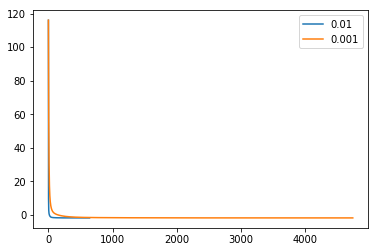

In [5]:
rho_grid = [1, 0.1, 0.01, 0.001, 0.0001]
rho_convergence = []
f_minimum_results = []
rho_no_convergence = []
for rho in rho_grid:
    GradResults = gradient_rho_constant(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    if GradResults['converged']:
        rho_convergence.append(rho)
        f_minimum_results.append(GradResults['f_minimum'])
        plt.plot(range(GradResults["iterations"] + 1), GradResults["f_values"], label = str(rho))
        
    else:
        print('No convergence for rho = ', rho)
        rho_no_convergence.append(rho)
        
plt.legend() 
# plt.ylim((-10, 120))
plt.show()

On a des convergences stables pour $\rho \in \{0.01, 0.001 \}$, $\rho = 0.01$ donne une convergence plus rapide, ce qui est normal vu que c'est un pas d'apprentissage plus grand que $0.001$ et qui n'entraîne pas de divergence de la fonction autour du minimum.

## Méthode du gradient à pas adptatif

Le choix d'un pas constant peut s'avérer contraignant, en effet il faut choisir un pas qui résulte en une bonne exploration de l'espace de notre variable sans pour autant diverger du minimum. On pourra par exemple augmenter le pas lorsque $f(x_{n+1}) \le f(x_n)$ et le diminuer sinon.

In [6]:
def gradient_rho_adaptatif(fun, fun_der, U0, rho, tol,args):

    itermax=10000  # nombre maximal d'itérations 
    xn=U0
    f=fun(xn,*args) # point initial de l'algorithme
    it=0         # compteur pour les itérations
    converged = False
    x_values = [xn]
    f_values = [f]
    
    while (~converged & (it < itermax)):
        it=it+1
        dfx=fun_der(xn,*args)       # valeur courante de la fonction à minimiser
        xnp1=xn-rho*dfx             # nouveau point courant (x_{n+1})
        fnp1=fun(xnp1,*args)
        if fnp1 < fun(xn,*args):
            rho = rho*2
            
        else:
            rho = rho/2
            
        if abs(fnp1 - f) < tol:
            converged = True
        xn=xnp1; f=fnp1;           # xnp1 : nouveau point courant
        x_values.append(xn)
        f_values.append(f)

    GradResults = {
            'initial_x':U0,
            'minimum':xnp1,
            'f_minimum':fnp1,
            'iterations':it,
            'converged':converged,
            'x_values':x_values,
            'f_values':f_values
            }
    return GradResults

In [7]:
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut = time.time()
GradResults=gradient_rho_adaptatif(f1,df1,x0,rho=0.001,tol=1e-6,args=(B,S))
tps_ecoule = time.time()-debut
print('tps écoulé (gradient_rho_constant):',tps_ecoule)
print(GradResults['minimum'])

tps écoulé (gradient_rho_constant): 0.023088932037353516
[-0.6813617   0.14924945 -0.61429956  0.48568951 -0.0336978 ]


On teste notre algorithme adaptatif sur la même grille que précédemment.

No convergence for rho =  0.01


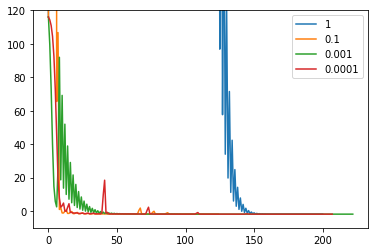

In [8]:
rho_grid = [1, 0.1, 0.01, 0.001, 0.0001]
rho_convergence = []
f_minimum_results = []
rho_no_convergence = []
for rho in rho_grid:
    GradResults=gradient_rho_adaptatif(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    if GradResults['converged']:
        rho_convergence.append(rho)
        f_minimum_results.append(GradResults['f_minimum'])
        plt.plot(range(GradResults["iterations"] + 1), GradResults["f_values"], label = str(rho))
        
    else:
        print('No convergence for rho = ', rho)
        rho_no_convergence.append(rho)
        
plt.legend() 
plt.ylim((-10, 120))
plt.show()

On peut voir que la "qualité" de la convergence dépend du $\rho$, elle est lente et instable pour $\rho = 1$

On choisit une valeur de "bonne" valeur $\rho$ pour chaque méthode et on compare les performances.
On prend alors $\rho = 0.01$ pour gradient_rho_constant et $\rho = 0.1$ pour gradient_rho_adaptatif.

In [9]:
rho_const = 0.01
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut = time.time()
GradResultsConstant=gradient_rho_constant(f1,df1,x0,rho=rho_const,tol=1e-6,args=(B,S))
tps_ecoule = time.time()-debut
print('tps écoulé (gradient_rho_constant):',tps_ecoule)
print(GradResults['minimum'])
print("Nombre d'itérations : ", GradResultsConstant['iterations'])

tps écoulé (gradient_rho_constant): 0.053941965103149414
[-0.68577502  0.1518605  -0.61419559  0.48823926 -0.03959053]
Nombre d'itérations :  641


In [10]:
rho_ad = 0.1
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

debut = time.time()
GradResultsAdaptatif=gradient_rho_adaptatif(f1,df1,x0,rho=rho_ad,tol=1e-6,args=(B,S))
tps_ecoule = time.time()-debut
print('tps écoulé (gradient_rho_constant):',tps_ecoule)
print(GradResults['minimum'])
print("Nombre d'itérations : ", GradResultsAdaptatif['iterations'])

tps écoulé (gradient_rho_constant): 0.018518924713134766
[-0.68577502  0.1518605  -0.61419559  0.48823926 -0.03959053]
Nombre d'itérations :  124


La méthode adaptative converge plus rapidement que la méthode à pas constant pour nos valeurs de $\rho$ choisies, le nombre d'itérations est beaucoup plus petit: 124 face à 641, et les appels à la fonction coût par itération reste le même entre les deux méthodes.

## Méthode de Quasi-Newton

In [11]:
from scipy.optimize import minimize

debut = time.time()
NewtonResults = minimize(f1, x0, jac = df1, args = (B,S), method = 'BFGS', tol=1e-6)
tps_ecoule = time.time()-debut
print('tps écoulé (BFGS):', tps_ecoule)
print('Valeur du minimum de f1 : ', NewtonResults.fun)
print("Nombre d'itérations : ", NewtonResults.nit)

tps écoulé (BFGS): 0.0015308856964111328
Valeur du minimum de f1 :  -1.836962311965253
Nombre d'itérations :  10


On converge vers le même minimum pour f1 beaucoup plus rapidement en temps d'éxécution et en nombre d'itération (10 face à 124 de la méthode du gradient à pas adaptatif et 641 de la méthode du gradient à pas constant). L'autre avantage des méthodes de quasi-newton est qu'on ne choisit pas le pas $\rho$

# Optimisation sous contraintes

## Sequential Quadratic Programming

In [12]:
from scipy.optimize import minimize

debut = time.time()
SQPResults = minimize(f1, x0, jac = df1, args = (B,S), method = 'SLSQP', tol=1e-6, bounds = [(0, 1) for k in range(5)])
tps_ecoule = time.time()-debut
print('tps écoulé (BFGS):', tps_ecoule)
print('Valeur du minimum de f1 : ', SQPResults.fun)
print("Nombre d'itérations : ", SQPResults.nit)
print("Valeur du minimum : ", SQPResults.x)

tps écoulé (BFGS): 0.005149364471435547
Valeur du minimum de f1 :  -0.13853161423986765
Nombre d'itérations :  9
Valeur du minimum :  [1.08020986e-15 1.26984963e-01 2.70234387e-15 1.94536212e-02
 0.00000000e+00]


On a bien le minimum qui respect la contrainte $U_{ad}$

## Méthode de pénalisation

On définit la pénalisation $\beta$ sur $U_{ad} = [0, 1]^5$ de la manière suivante:
\begin{equation}
\beta(x) = \sum_{i = 1}^{5}[(-x_i)^{+} + (x_i - 1)^{+}]^2
\end{equation}
où x = [x_1, x_2, x_3, x_4, x_5]

In [13]:
def beta(x):
    
    """
    
    Description
    -----------
    La pénalisation de x sur le pavé Uad = [0, 1]^5
    
    Parameters
    -----------
    x : list of 5 elements. The current point of the algorithm.
    
    Returns
    -----------
    Float, la pénalisation sur le pavé.
    
    """
    s = 0
    for xi in x:
        s += (max(0, -xi) + max(0, xi - 1))**2
        
    return s

Maintenant on définit les fonctions pénalisation de f1 et f2.

In [14]:
def f1penal(U, B, S, epsilon):
    return f1(U, B, S) + beta(U)/epsilon

In [15]:
def f2(U, S):
    n=U.shape[0]
    U=np.matrix(U)
    U.shape=(n,1)
    fU = np.transpose(U) * S * U + np.transpose(U) * np.exp(U);
    return float(fU)
    
def f2penal(U, S, epsilon):
    return f2(U, S) + beta(U)/epsilon

Dans notre algorithme d'optimisation avec pénalisation, on considère la suite décroissante $(\epsilon_n)$ où $\epsilon_n = \frac{1}{2^n}$

Pour que la fonction optimize_penalty_bis agisse sur les deux fonctions f1 et f2 (en réalité elle prend comme argument la fonction pénalisé). Il faut définir f1penal (respectivement f2penal) qui prend epsilon comme dernier argument.

In [16]:
def optimize_penalty_bis(fun, U0, tol, args):
    
    itermax = 10000  # nombre maximal d'itérations 
    xn = U0
    f = fun(xn, *args) # point initial de l'algorithme
    it = 0         # compteur pour les itérations
    converged = False;
    
    while (~converged & (it < itermax)):
        it=it+1
        xnp1 = minimize(fun, xn, args = args, method = 'BFGS', tol = 1e-6).x
        fnp1 = fun(xnp1, *args)
        if abs(fnp1-f) < tol:
            converged = True
        xn=xnp1; f=fnp1;            # xnp1 : nouveau point courant
        args = list(args)
        args[-1] /= 2
        args = tuple(args)

    PenaltyResults = {
            'initial_x':U0,
            'minimum':xnp1,
            'f_minimum':fnp1,
            'iterations':it,
            'converged':converged
            }
    return PenaltyResults

Optimisation avec pénalisation de f1

In [17]:
debut = time.time()
epsilon0 = 1
args = (B, S, epsilon0)
PenaltyResults1 = optimize_penalty_bis(f1penal, x0, 1e-6, args)
tps_ecoule = time.time()-debut
print('tps écoulé (BFGS):', tps_ecoule)
print('Valeur du minimum de f1 : ', PenaltyResults1['f_minimum'])
print("Nombre d'itérations : ", PenaltyResults1['iterations'])
print("Valeur du minimum : ", PenaltyResults1['minimum'])

tps écoulé (BFGS): 0.34787487983703613
Valeur du minimum de f1 :  -0.13853243975221347
Nombre d'itérations :  24
Valeur du minimum :  [-3.53161469e-08  1.26885928e-01 -2.47327616e-07  1.94103685e-02
 -2.06874547e-08]


Optimisation avec pénalisation de f2.

In [18]:
debut = time.time()
epsilon0 = 1
args = (S, epsilon0)
PenaltyResults2 = optimize_penalty_bis(f2penal, x0, 1e-6, args)
tps_ecoule = time.time()-debut
print('tps écoulé (BFGS):', tps_ecoule)
print('Valeur du minimum de f2 : ', PenaltyResults2['f_minimum'])
print("Nombre d'itérations : ", PenaltyResults2['iterations'])
print("Valeur du minimum : ", PenaltyResults2['minimum'])

tps écoulé (BFGS): 0.2063443660736084
Valeur du minimum de f2 :  -5.95457479883209e-07
Nombre d'itérations :  22
Valeur du minimum :  [-2.45870177e-07 -2.45866973e-07 -2.45864400e-07 -2.45865000e-07
 -2.45865302e-07]


### Vérification des résultats

Vérifions les résultats sur f1 et f2 obtenus avec la méthode par pénalisation en les comparant avec les résultats obtenus avec un algorithme SQP.

In [ ]:
debut = time.time()
SQPResults1 = minimize(f1, x0, args = (B, S), method = 'SLSQP', tol=1e-6, bounds = [(0, 1) for k in range(5)])
tps_ecoule = time.time()-debut
print('tps écoulé (SLSQP):', tps_ecoule)
print('Valeur du minimum de f1 : ', SQPResults1.fun)
print("Nombre d'itérations : ", SQPResults1.nit)
print("Valeur du minimum : ", SQPResults1.x)

tps écoulé (SLSQP): 0.0041730403900146484
Valeur du minimum de f1 :  -0.13853161426486305
Nombre d'itérations :  9
Valeur du minimum :  [0.00000000e+00 1.26984956e-01 0.00000000e+00 1.94536138e-02
 2.16628331e-15]


In [ ]:
debut = time.time()
SQPResults2 = minimize(f2, x0, args = (S), method = 'SLSQP', tol=1e-6, bounds = [(0, 1) for k in range(5)])
tps_ecoule = time.time()-debut
print('tps écoulé (SLSQP):', tps_ecoule)
print('Valeur du minimum de f2 : ', SQPResults2.fun)
print("Nombre d'itérations : ", SQPResults2.nit)
print("Valeur du minimum : ", SQPResults2.x)

tps écoulé (SLSQP): 0.0036458969116210938
Valeur du minimum de f2 :  2.976067656614975e-15
Nombre d'itérations :  4
Valeur du minimum :  [1.72929872e-16 2.17964615e-15 5.95736056e-16 0.00000000e+00
 2.77555756e-17]


Regardons les différences entre les résultats des deux approches. On prend la norm de la différence entre les points minimum (chacun obtenu par une approche) et les valeurs de f1 et f2 en points.

In [ ]:
print('Différence des minimums pour f1 : ', np.linalg.norm(SQPResults1.x - PenaltyResults1['minimum']))
print('Différence des minimums pour f2 : ', np.linalg.norm(SQPResults2.x - PenaltyResults2['minimum']))

print('Différence des valeurs de f1 en les minimums : ', abs(SQPResults1.fun - PenaltyResults1['f_minimum']))
print('Différence des valeurs de f2 en les minimums : ', abs(SQPResults2.fun - PenaltyResults2['f_minimum']))

Différence des minimums pour f1 :  0.00010805959170449629
Différence des minimums pour f2 :  5.497739193420062e-07
Différence des valeurs de f1 en les minimums :  8.254873504198734e-07
Différence des valeurs de f2 en les minimums :  5.954574828592766e-07


On obtient donc bien des résultats très proches moyennant ces deux approches.

##  Méthodes duales pour l'optimisation sous contraintes

In [ ]:
def L1(x, B, S, lambd):
    
    """
    
    Lagrangien associé à f1 et à la contrainte Uad = [0, 1]^5
    
    """
    s = f1(x, B, S)
    for i in range(10):
        if i <= 4:
            s += lambd[i]*(-x[i])
            
        else:
            s += lambd[i]*(x[i%5] - 1)
            
    return s

In [ ]:
def Uzawa(fun, U0, rho, tol, args):
    
    itermax = 10000  # nombre maximal d'itérations 
    xn = U0
    lambdn = args[-1] # lambda
    f = fun(xn, *args) # point initial de l'algorithme
    it = 0         # compteur pour les itérations
    converged = False;
    
    while (~converged & (it < itermax)):
        it = it + 1
        xnp1 = minimize(fun, xn, args = args, method = 'BFGS', tol = 1e-6).x
        fnp1 = fun(xnp1, *args)
        if abs(fnp1-f) < tol:
            converged = True
        xn=xnp1; f=fnp1;            # xnp1 : nouveau point courant
        args = list(args)
        gradlambd = np.array([-xn[i] for i in range(5)] + [(xn[i] - 1) for i in range(5)])
#         args[-1] += np.array([max(rho*gradlambd[i], 0) for i in range(len(gradlambd))]) # Update lambda
        args[-1] += rho*gradlambd
        args[-1] = np.array([max(args[-1][i], 0) for i in range(len(gradlambd))])
        args = tuple(args)
    
    UzawaResults = {
            'initial_x':U0,
            'minimum':xnp1,
            'f_minimum':fnp1,
            'iterations':it,
            'converged':converged
            }
    return UzawaResults

### Application sur f1

In [ ]:
debut = time.time()
lambd0 = np.ones(10)
args = (B, S, lambd0)
UzawaResults1 = Uzawa(L1, x0, 0.1, 1e-10, args)
tps_ecoule = time.time() - debut
print('tps écoulé (Uzawa):', tps_ecoule)
print('Valeur du minimum de f1 : ', UzawaResults1['f_minimum'])
print("Nombre d'itérations : ", UzawaResults1['iterations'])
print("Valeur du minimum : ", UzawaResults1['minimum'])

tps écoulé (Uzawa): 8.579363107681274
Valeur du minimum de f1 :  -0.13853176769095196
Nombre d'itérations :  3797
Valeur du minimum :  [ 1.78473145e-05  1.26907620e-01 -2.16153175e-05  1.94260530e-02
 -1.45058540e-05]


In [ ]:
f1(UzawaResults1['minimum'], B, S)

-0.13863072387264566

On compare les minimums de f1 obtenus avec les méthodes Uzawa et SQP

In [ ]:
print('Différence des minimums pour f1 : ', np.linalg.norm(SQPResults1.x - UzawaResults1['minimum']))

Différence des minimums pour f1 :  8.795838959798934e-05


Les deux méthodes convergent bien vers le même minimum unique de f1.

### Application sur f2

In [ ]:
def L2(x, S, lambd):
    
    """
    
    Lagrangien associé à f1 et à la contrainte Uad = [0, 1]^5
    
    """
    s = f2(x, S)
    for i in range(10):
        if i <= 4:
            s += lambd[i]*(-x[i])
            
        else:
            s += lambd[i]*(x[i%5] - 1)
            
    return s

In [ ]:
debut = time.time()
lambd0 = np.ones(10)
args = (S, lambd0)
UzawaResults2 = Uzawa(L2, x0, 0.1, 1e-20, args)
tps_ecoule = time.time() - debut
print('tps écoulé (Uzawa):', tps_ecoule)
print('Valeur du minimum de f2 : ', UzawaResults2['f_minimum'])
print("Nombre d'itérations : ", UzawaResults2['iterations'])
print("Valeur du minimum : ", UzawaResults2['minimum'])

tps écoulé (Uzawa): 6.900090932846069
Valeur du minimum de f2 :  3.069075884807169e-15
Nombre d'itérations :  10000
Valeur du minimum :  [-2.10674299e-09  1.14633498e-09  4.08011906e-09  2.01751742e-09
  3.15761027e-09]


### Vérification des résultats

Comme pour la méthode de pénalisation, comparons maintenant les résultats obtenus par l'algorithme d'Uzawa et par un algorithme SQP.

In [ ]:
print('Différence des minimums pour f1 : ', np.linalg.norm(SQPResults1.x - UzawaResults1['minimum']))
print('Différence des minimums pour f2 : ', np.linalg.norm(SQPResults2.x - UzawaResults2['minimum']))

print('Différence des valeurs de f1 en les minimums : ', abs(SQPResults1.fun - UzawaResults1['f_minimum']))
print('Différence des valeurs de f2 en les minimums : ', abs(SQPResults2.fun - UzawaResults2['f_minimum']))

Différence des minimums pour f1 :  8.795838959798934e-05
Différence des minimums pour f2 :  6.036612567708126e-09
Différence des valeurs de f1 en les minimums :  1.5342608891688592e-07
Différence des valeurs de f2 en les minimums :  9.300822819219412e-17


On obtient donc bien des résultats très proches.

## Optimisation non convexe - Recuit simulé

In [ ]:
def f3(U, B, S):
    
    return f1(U, B, S) + 10*np.sin(2*f1(U, B, S))

### Minimisation par BFGS

On essaie les points initiaux [1, 1, 1, 1, 1] et [0, 0, 0, 0, 0]

In [ ]:
debut = time.time()
x0 = np.ones((d,))
NewtonResults = minimize(f3, x0, args = (B, S), method = 'BFGS', tol=1e-10)
tps_ecoule = time.time()-debut
print('tps écoulé (BFGS):', tps_ecoule)
print('Valeur du minimum de f3 : ', NewtonResults.fun)
print('Valeur du point minimisant de f3 : ', NewtonResults.x)
print("Nombre d'itérations : ", NewtonResults.nit)

tps écoulé (BFGS): 0.03492617607116699
Valeur du minimum de f3 :  17.47643311291821
Valeur du point minimisant de f3 :  [1.13773313 0.69527366 0.31701339 0.53778966 0.50675153]
Nombre d'itérations :  6


In [ ]:
debut = time.time()
x0 = np.zeros((d,))
NewtonResults = minimize(f3, x0, args = (B, S), method = 'BFGS', tol=1e-10)
tps_ecoule = time.time()-debut
print('tps écoulé (BFGS):', tps_ecoule)
print('Valeur du minimum de f3 : ', NewtonResults.fun)
print('Valeur du point minimisant de f3 : ', NewtonResults.x)
print("Nombre d'itérations : ", NewtonResults.nit)

tps écoulé (BFGS): 0.03083634376525879
Valeur du minimum de f3 :  -10.797900769519343
Valeur du point minimisant de f3 :  [-0.08806077  0.17642997 -0.337911    0.05741153  0.12232578]
Nombre d'itérations :  8


On ne converge pas vers les mêmes minimas locaux.

### Simulated Annealing

On teste l'algorithme Simulated Annealing avec une liste de points initiaux pour voir si on converge toujours vers le même minima.

In [ ]:
from scipy.optimize import basinhopping
debut = time.time()
x0 = np.ones(d)
args = (B, S)
SimulatedAnnealingResults = basinhopping(f3, x0, 1000, minimizer_kwargs = {"args" : (B, S)})
tps_ecoule = time.time()-debut
print('tps écoulé (SimulatedAnnealing):', tps_ecoule)
print('Valeur du minimum de f3 : ', SimulatedAnnealingResults.fun)
print('Valeur du point minimisant de f3 : ', SimulatedAnnealingResults.x)
print("Nombre d'itérations : ", SimulatedAnnealingResults.nit)

tps écoulé (SimulatedAnnealing): 20.395237922668457
Valeur du minimum de f3 :  -10.797900769519423
Valeur du point minimisant de f3 :  [ 0.09312001 -0.06746167 -0.29671142 -0.03672598  0.60098799]
Nombre d'itérations :  1000


In [ ]:
initialPoints = [np.ones(d), np.zeros(d)] + [np.random.rand(d) for k in range(5)]
f3_minimas = []
f3_values = []
for x0 in initialPoints:
    SimulatedAnnealingResults = basinhopping(f3, x0, 1000, minimizer_kwargs = {"args" : (B, S)})
    f3_minimas.append(SimulatedAnnealingResults.x)
    f3_values.append(SimulatedAnnealingResults.fun)

In [ ]:
f3_values

On converge bien vers le même minimum de la fonction.

# Synthèse d'un filtre à réponse impulsionnelle finie

In [ ]:
def H(h, mu):
    
    """
    
    Description
    -----------
    Réponse fréquentielle
    
    Parameters
    -----------
    h : List, 30 coefficients. C'est la variable par rapport à laquelle on va minimiser H.
    mu : Int, la variable fréquence.
        
    Returns
    -----------
    La réponse fréquentielle
    
    """
    
    n = h.shape[0]
    h = np.matrix(h)
    h.shape = (n,1)
    Cos = [np.cos(2*np.pi*mu*i) for i in range(n)] # La liste contenant les valeurs cos(2*pi*mu*i)
    Cos = np.matrix(Cos)
    Cos.shape = (n, 1)
    Hh = np.transpose(h) * Cos
    return float(Hh)
    

In [ ]:
def J(h, p):
    """
    p: Int, 3*p sera le nombre de points pour le premier intervalle et 8*p pour le second pour qu'on ait
       une discrétisation uniforme des deux intervalles.
    """
    
    differences = []
    Mu1 = np.linspace(0, 0.1, 3*p)
    Mu2 = np.linspace(0.15, 0.5, 8*p)
    for mu in Mu1:
        differences.append(abs(1 - H(h, mu)))
        
    for mu in Mu2:
        differences.append(abs(- H(h, mu)))
        
    return max(differences)


In [ ]:
debut = time.time()
h0 = np.ones(30)
p = 5
NewtonResults = minimize(J, h0, args = (p), method = 'BFGS', tol=1e-10)
tps_ecoule = time.time()-debut
print('tps écoulé (BFGS):', tps_ecoule)
print('Valeur du minimum de J : ', NewtonResults.fun)
print("Nombre d'itérations : ", NewtonResults.nit)
print("Etat de convergence : ", NewtonResults.success)

In [ ]:
NewtonResults.message

On va reformuler le problème précédent comme un problème d'optimisation linéaire:


$$ min\left(z \right) $$ 


sous les contraintes:
$$
\forall j
\begin{cases}
H_0\left(\mu_j \right) - H\left(\mu_j \right) &\le z \\
H_0\left(\mu_j \right) - H\left(\mu_j \right) &\ge -z
\end{cases}
$$
qu'on peut reformuler:
$$
\forall j
\begin{cases}
H_0\left(\mu_j \right) - H\left(\mu_j \right) - z &\le 0 \\
-H_0\left(\mu_j \right) + H\left(\mu_j \right) - z &\le 0
\end{cases}
$$